In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

In [2]:
df = pd.DataFrame(np.array([[7,6.5,9.2,8.6,8],
                            [7.5,9.4,7.3,7,7],
                            [7.6,9.2,8,8,7.5],
                            [5,6.5,6.5,7,9],
                            [6,6,7.8,8.9,7.3],
                            [7.8,9.6,7.7,8,6.5],
                            [6.3,6.4,8.2,9,7.2],
                            [7.9,9.7,7.5,8,6],
                            [6,6,6.5,5.5,8.7],
                            [6.8,7.2,8.7,9,7]]),
                  index=('Lucia','Pedro','Ines','Luis','Andres','Ana','Carlos','Jose','Sonia','Maria'),
                  columns=('Matematicas','Ciencias','Español','Historia','EdFisica'))
df

,Matematicas,Ciencias,Español,Historia,EdFisica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
Maria,6.8,7.2,8.7,9.0,7.0


In [3]:
# deyerminar numero de renglones de la base de datos

index = df.index
renglones = len(index)
renglones

10

In [4]:
# Estandarizacion de la variables

df2 = StandardScaler().fit_transform(df)
df2

array([[ 0.23263076, -0.7529862 ,  1.78848525,  0.65792263,  0.65858084],
       [ 0.78651352,  1.14584856, -0.53899555, -0.84590053, -0.47690337],
       [ 0.89729007,  1.01489444,  0.31849737,  0.09398895,  0.09083874],
       [-1.98290027, -0.7529862 , -1.51898747, -0.84590053,  1.79406505],
       [-0.87513476, -1.0803715 ,  0.07349939,  0.93988948, -0.13625811],
       [ 1.11884317,  1.27680268, -0.0489996 ,  0.09398895, -1.04464547],
       [-0.5428051 , -0.81846326,  0.56349535,  1.03387842, -0.24980653],
       [ 1.22961972,  1.34227974, -0.29399757,  0.09398895, -1.61238758],
       [-0.87513476, -1.0803715 , -1.51898747, -2.25573474,  1.45341979],
       [ 0.01107766, -0.29464677,  1.1759903 ,  1.03387842, -0.47690337]])

In [5]:
# calcular la matriz de correlacion para la matriz transformada

A= (1/renglones) * np.dot(df2.T,df2)
A

array([[ 1.        ,  0.85407878,  0.38457424,  0.20719425, -0.78716269],
       [ 0.85407878,  1.        , -0.02005218, -0.02153942, -0.68772056],
       [ 0.38457424, -0.02005218,  1.        ,  0.82091619, -0.36554342],
       [ 0.20719425, -0.02153942,  0.82091619,  1.        , -0.50800132],
       [-0.78716269, -0.68772056, -0.36554342, -0.50800132,  1.        ]])

In [6]:
# Entrenamiento del modelo PCA con escalado de datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenaado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

print('Eigenvalores:')
result = LA.eig(A)
print(result[0])


Eigenvalores:
[2.89324967 1.62865042 0.34659605 0.00889139 0.12261246]


In [7]:
# Porcentaje de varianza explicada por cada componente
print ('Este valor se obtiene dividiendo cada eigenvalor entre la suma de todos los eigenvalores')
print('\nPorcentaje de varianza explicada por cada componente:')
print(modelo_pca.explained_variance_ratio_)

Este valor se obtiene dividiendo cada eigenvalor entre la suma de todos los eigenvalores

Porcentaje de varianza explicada por cada componente:
[0.57864993 0.32573008 0.06931921 0.02452249 0.00177828]


In [8]:
# calculo de eigenvectores

print('Eigenvectores por renglón:')
pd.DataFrame(data = modelo_pca.components_,
             columns = df.columns,
             index = ['PC1','PC2','PC3','PC4','PC5'])

Eigenvectores por renglón:


,Matematicas,Ciencias,Español,Historia,EdFisica
PC1,-0.526644,-0.424936,-0.359147,-0.352697,0.537302
PC2,-0.270496,-0.508072,0.562082,0.586490,0.093746
PC3,0.438201,0.040495,0.562276,-0.394180,0.578626
PC4,-0.261218,0.673627,-0.070086,0.446645,0.523056
PC5,0.623878,-0.325390,-0.483747,0.420433,0.306794


In [9]:
# Proyección de los datos en el nuevo sistema de coordenadas

proyecciones = np.dot(modelo_pca.components_, df2.T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1','PC2','PC3','PC4','PC5'])
proyecciones=proyecciones.transpose().set_index(df.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5
Lucia,-0.323063,1.772525,1.198801,-0.055015,0.003633
Pedro,-0.665441,-1.638702,0.145476,-0.023065,-0.123377
Ines,-1.002547,-0.515692,0.628888,0.516444,0.142876
Luis,3.172095,-0.262782,-0.381960,0.677777,-0.062504
Andres,0.488868,1.365402,-0.835236,-0.155792,0.123367
Ana,-1.708633,-1.021700,-0.127077,0.066833,0.025292
Carlos,-0.067586,1.462336,-0.506240,-0.117928,0.013124
Jose,-2.011855,-1.275865,-0.542150,-0.197787,0.017434
Sonia,3.042030,-1.254881,0.448829,-0.639999,0.037885
Maria,-0.923869,1.369359,-0.029330,-0.071467,-0.177730


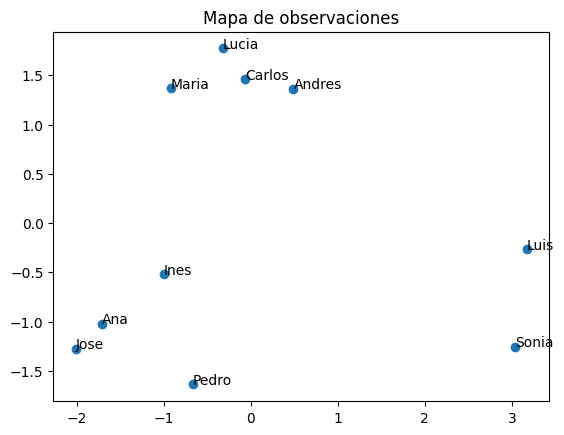

In [10]:
# Graficar las proyecciones en el plano
x = proyecciones.iloc[:,0]
y = proyecciones.iloc[:,1]
z = df.index
x= x.to_numpy()
y= y.to_numpy()
fig, ax = plt.subplots()
ax.set_title('Mapa de observaciones')
ax.scatter(x, y)

# Etiquetar los puntos en el plano
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

In [11]:
componentes2 =pd.DataFrame( data= modelo_pca.components_,
                           columns = df.columns, 
                           index = ['PC1','PC2','PC3','PC4','PC5'])

componentes2 = componentes2.iloc[0:2,:]
componentes2 = componentes2.T
componentes2

,PC1,PC2
Matematicas,-0.526644,-0.270496
Ciencias,-0.424936,-0.508072
Español,-0.359147,0.562082
Historia,-0.352697,0.586490
EdFisica,0.537302,0.093746


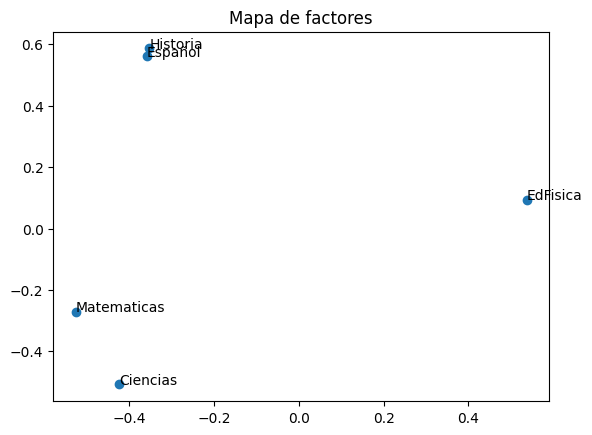

In [13]:
# Graficar las proyecciones en el plano
x = componentes2.iloc[:,0]
y = componentes2.iloc[:,1]
z = componentes2.index
x= x.to_numpy()
y= y.to_numpy()
fig, ax = plt.subplots()
ax.set_title('Mapa de factores')
ax.scatter(x, y)

# Etiquetar los puntos en el plano
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

In [14]:
# Procedimiento para obtener la matriz estandarizada de los datos originales
# es la misma matriz de datos originales pero estandarizada
# se obtiene multiplicando la matriz de proyecciones por la matriz de componentes
# y sumando la media de cada variable

original = np.dot(modelo_pca.components_.T, proyecciones.T)
original = original.T
print ('Matriz estandarizada de los datos originales')
print(original)

Matriz estandarizada de los datos originales
[[ 0.23263076 -0.7529862   1.78848525  0.65792263  0.65858084]
 [ 0.78651352  1.14584856 -0.53899555 -0.84590053 -0.47690337]
 [ 0.89729007  1.01489444  0.31849737  0.09398895  0.09083874]
 [-1.98290027 -0.7529862  -1.51898747 -0.84590053  1.79406505]
 [-0.87513476 -1.0803715   0.07349939  0.93988948 -0.13625811]
 [ 1.11884317  1.27680268 -0.0489996   0.09398895 -1.04464547]
 [-0.5428051  -0.81846326  0.56349535  1.03387842 -0.24980653]
 [ 1.22961972  1.34227974 -0.29399757  0.09398895 -1.61238758]
 [-0.87513476 -1.0803715  -1.51898747 -2.25573474  1.45341979]
 [ 0.01107766 -0.29464677  1.1759903   1.03387842 -0.47690337]]
